Name - **D.M.S.S.Dissanayake**
Index No - **190155L**

### **Blobs**

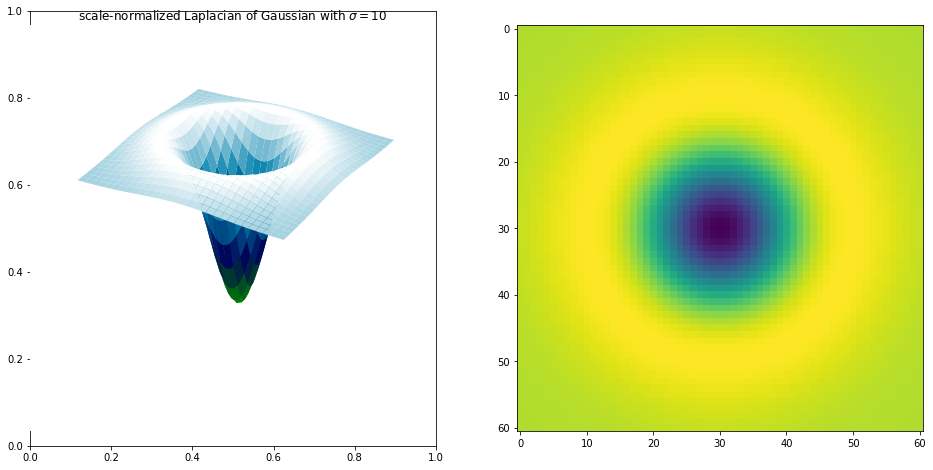

In [78]:
# Question 1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

sigma = 10
hw = 3*sigma
X,Y = np.meshgrid(np.arange(-hw,hw+1,1),np.arange(-hw,hw+1,1))
log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))# laplacian of gaussian

fig,ax = plt.subplots(1,2,figsize=(16,8))
ax1 = fig.add_subplot(121,projection = '3d')

surf = ax1.plot_surface(X,Y,log, cmap = cm.ocean, antialiased = True)

ax1.set_title(r'scale-normalized Laplacian of Gaussian with $\sigma = 10$')
ax1.axis('off')
ax[1].imshow(log)
plt.show()


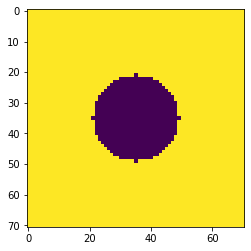

In [77]:
# Question 2
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

w, h = 71, 71
hw,hh= w//2,h//2

f = np.ones((h,w), dtype = np.float32)*255
X,Y = np.meshgrid(np.arange(-hh,hh+1,1),np.arange(-hw,hw+1,1))

r = w//5 # radius 14
f *= X**2 +Y**2 > r**2
plt.imshow(f)

(1, 8, 7)
12
(1, 8, 7)
12
(1, 8, 7)
12
(1, 8, 7)
12
(1, 8, 7)
12
(1, 8, 7)
12
(1, 8, 7)
12
(1, 38, 8)
13
(3, 29, 10)
15
(3, 29, 10)
15
(35, 35, 5)
10


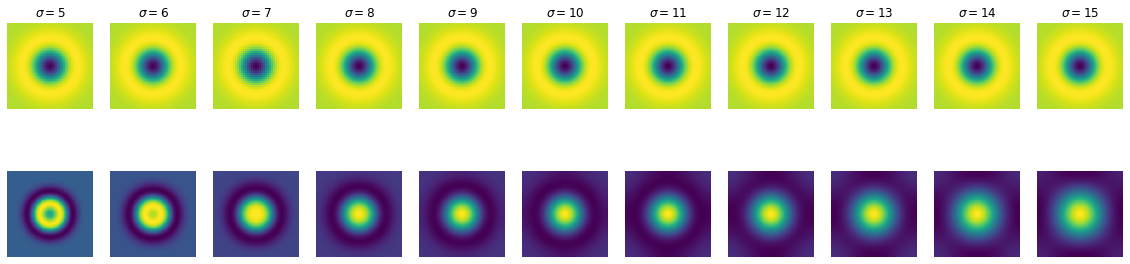

In [99]:
s = 11
fig, ax = plt.subplots(2,s,figsize =(20,5))
scale_space = np.empty((h,w,s), dtype = np.float32)
sigmas = np.arange(5,16,1)
for i, sigma in enumerate(np.arange(5,16,1)):
    log_hw = 3*np.max(sigma)
    X,Y = np.meshgrid(np.arange(-log_hw,log_hw+1,1),np.arange(-log_hw,log_hw+1,1))
    log = 1/(2*np.pi*sigma**2)*(X**2/(sigma**2)+Y**2/(sigma**2)-2)*np.exp(-(X**2+Y**2)/(2*sigma**2))
    f_log = cv.filter2D(f,-1,log)
    scale_space[:,:,i] = f_log
    ax[0,i].imshow(log)
    ax[0,i].axis('off')
    ax[0,i].set_title(r'$\sigma = {}$'.format(sigma))
    ax[1,i].imshow(f_log)
    ax[1,i].axis('off')
    
    indices = np.unravel_index(np.argmax(scale_space, axis =None), scale_space.shape)
    print(indices) # r = \sqrt{2}*sigma
    print(sigmas[indices[2]])

#### **Discussion**

To get a maximum response the zeros of the laplacian have to be aligned with the circle, and at the maximum response, the value of sigma is given by $\sigma$ = r/$\sqrt{2}$. Since radius of the circle is 14, value of $\sigma$ = 9.89.

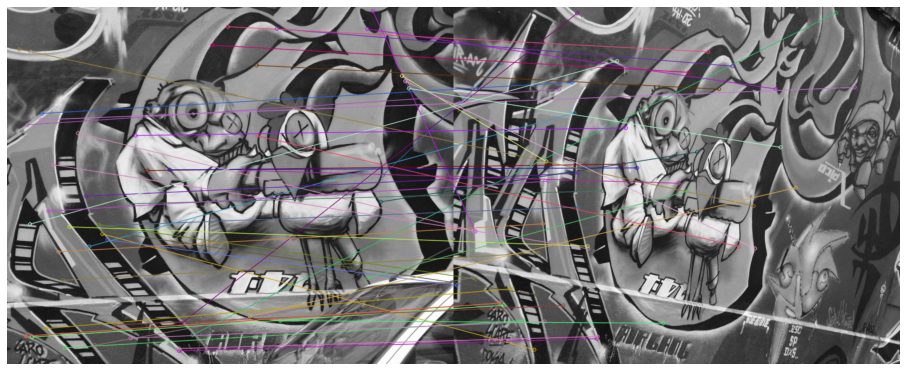

In [100]:
# Question 3
import numpy as np
import cv2 as cv
img1 = cv.imread("graf/img1.ppm")
img2 = cv.imread("graf/img3.ppm")
img1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

sift = cv.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(img1, None) # detect features from the image
keypoints_2, descriptors_2 = sift.detectAndCompute(img2, None) # detect features from the image

# draw the detected key points
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

matched_img = cv.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:50], img2, flags=2)
plt.figure(figsize=(16,8))
plt.imshow(matched_img)
plt.axis('off')
plt.show()



### **Fitting Basics**

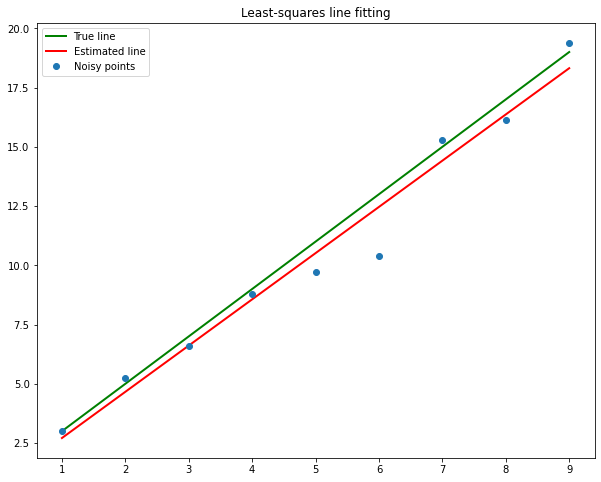

In [103]:
# Question 4
import numpy as np
import matplotlib.pyplot as plt

m = 2 
c = 1
x = np.arange(1 ,10 , 1)
np.random.seed(45)
noise = np.random.randn(len(x))
o = np.zeros (x.shape)
# o[=1] = 20
y = m*x + c + noise + o

n=len(x)
X=np.concatenate([x.reshape(n,1), np.ones((n,1))], axis = 1)
B= np.linalg.pinv(X.T @ X) @ X.T@ y
mstar = B[0]
cstar =B[1]

plt.figure(figsize=(10,8))
plt.plot([x[0],x[-1]],[m*x[0]+c, m*x[-1]+c], color='g', linewidth = 2, label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar, mstar*x[-1]+cstar], color='r', linewidth = 2, label=r'Estimated line')
plt.plot(x,y,'o',label = "Noisy points")
plt.title('Least-squares line fitting')
plt.legend(loc = 'best')
plt.show()

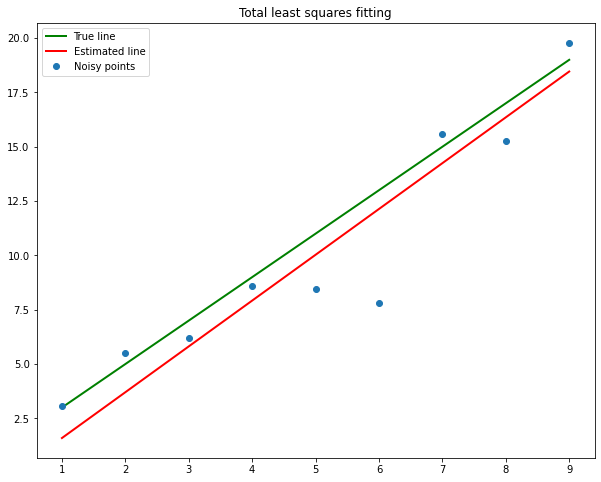

In [104]:
# Question 5
import numpy as np
import matplotlib.pyplot as plt

m = 2 
c = 1
x = np.arange(1 ,10 , 1)
np.random.seed(45)
noise = 2.*np.random.randn(len(x))
o = np.zeros (x.shape)
# o[=1] = 20
y = m*x + c + noise + o

n=len(x)

u11 = np.sum((x-np.mean(x))**2)
u12 = np.sum((x-np.mean(x))*(y - np.mean(y)))
u21 = u12
u22 = np.sum((y - np.mean(y))**2)

U = np.array([[u11,u12],[u21,u22]])
W, V = np.linalg.eig(U)
ev_corresponding_to_smallest_ev =V[:, np.argmin(W)]
a = ev_corresponding_to_smallest_ev[0]
b = ev_corresponding_to_smallest_ev[1] 
d = a*np.mean(x) + b*np.mean(y)

mstar = -a/b 
cstar = d/b

plt.figure(figsize=(10,8))
plt.plot([x[0],x[-1]],[m*x[0]+c, m*x[-1]+c], color='g', linewidth = 2, label=r'True line')
plt.plot([x[0],x[-1]],[mstar*x[0]+cstar, mstar*x[-1]+cstar], color='r', linewidth = 2, label=r'Estimated line')
plt.plot(x,y,'o',label = r'Noisy points')
plt.title('Total least squares fitting')
plt.legend(loc = 'best')